In [2]:
# Importing necessary libaries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

# Settig up NOAA API

In [3]:
from bs4 import BeautifulSoup
import requests
import json

https://towardsdatascience.com/getting-weather-data-in-3-easy-steps-8dc10cc5c859



In [4]:
#Example

token = "DptcEVNdhjZwzzXkECSLHNthAjJZAaga" 

url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/locations?locationcategoryid=CITY&sortfield=name&sortorder=desc&limit=1000"

response = requests.get(url, headers={'token': token})

data = response.json()
results = data["results"]

# 1.1 Scraping county_ids in CA

In [5]:
url="https://www.ncdc.noaa.gov/cdo-web/api/v2/locations?locationcategoryid=CNTY&limit=1000"

r = requests.get(url, headers={'token':token})
#load the api response as a json
county = r.json()

#county["results"]

In [47]:
county_id=[]
name=[]
mindate=[]
maxdate=[]
datacoverage=[]

#CA_dict['results0']['results'][0]
for i in range(len(county["results"])):

        county_id.append(county["results"][i]['id'])
        name.append(county["results"][i]['name'])
        datacoverage.append(county["results"][i]['datacoverage'])
        mindate.append(county["results"][i]['mindate'])
        maxdate.append(county["results"][i]['maxdate'])

In [48]:
#df_countys = pd.DataFrame({'index':list(range(1000))})

df_countys["fibs"]=pd.DataFrame(county_id)
df_countys["name"]=pd.DataFrame(name)
df_countys["datacoverage"]=pd.DataFrame(datacoverage)
df_countys["mindate"]=pd.DataFrame(mindate)
df_countys["maxdate"]=pd.DataFrame(maxdate)

In [49]:
#df_countys.drop(["index"],axis=1,inplace=True)

#df_countys[['county', 'state']] = df_countys['name'].str.split(',', 1, expand=True)
#df_countys.drop(["name"],axis=1,inplace=True)
df_countys['state']=df_countys['state'].apply(lambda x: x.replace(" ",""))

#extract minyear and maxyear
df_countys.mindate = pd.to_datetime(df_countys.mindate)
df_countys["min_year"]=df_countys.mindate.dt.year
df_countys.maxdate = pd.to_datetime(df_countys.maxdate)
df_countys["max_year"]=df_countys.maxdate.dt.year
df_countys["data_period"]=df_countys["max_year"]-df_countys["min_year"]

df_countys=df_countys[['fibs', 'county', 'state','datacoverage', 'mindate', 'maxdate', 'min_year',
       'max_year', 'data_period']]

In [29]:
#df_countys["state"].unique()

In [50]:
CA_counties=df_countys[df_countys["state"]=="CA"]
CA_counties

,fibs,county,state,datacoverage,mindate,maxdate,min_year,max_year,data_period
184,FIPS:06001,Alameda County,CA,1.0,1893-01-01,2021-03-04,1893,2021,128
185,FIPS:06003,Alpine County,CA,1.0,1903-10-01,2021-03-03,1903,2021,118
186,FIPS:06005,Amador County,CA,1.0,1903-12-01,2021-03-03,1903,2021,118
187,FIPS:06007,Butte County,CA,1.0,1893-01-01,2021-03-04,1893,2021,128
188,FIPS:06009,Calaveras County,CA,1.0,1894-02-01,2021-03-02,1894,2021,127
189,FIPS:06011,Colusa County,CA,1.0,1893-01-01,2021-03-03,1893,2021,128
190,FIPS:06013,Contra Costa County,CA,1.0,1879-01-01,2021-03-04,1879,2021,142
191,FIPS:06015,Del Norte County,CA,1.0,1893-01-01,2021-03-04,1893,2021,128
192,FIPS:06017,El Dorado County,CA,1.0,1893-01-01,2021-03-04,1893,2021,128
193,FIPS:06019,Fresno County,CA,1.0,1906-03-01,2021-03-04,1906,2021,115


In [31]:
len(CA_counties)

58

**In California are 58 counties. More information about them requiered:**
    
    - LONGITUDE
    - LATITUDE
    - SIZE
    
https://6f45g2d4rjnipqbg27qcdg1a-wpengine.netdna-ssl.com/wp-content/uploads/2019/04/CA-county_map2-590x642.gif

They have different size, the area will be splitted in Hexagons.

# 1.2 Scraping weather stations in CA

In [13]:
urls=[]

url="https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06&limit=1000"
urls.append(url)
url="https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06&limit=1000&offset=1000"
urls.append(url)
url="https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06&limit=1000&offset=2000"
urls.append(url)
url="https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06&limit=1000&offset=3000"
urls.append(url)
url="https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06&limit=1000&offset=4000"
urls.append(url)

In [14]:
CA_dict={}
i=0

for url in urls:
    response = requests.get(url, headers={'token': token})

    data = response.json()
    results = data["results"]
    
    CA_dict["results"+str(i)]=data
    
    i+=1

In [15]:
#len(CA_dict['results0']['results'])

In [91]:
CA_dict['results0']['results'][0]

{'elevation': 52.1,
 'mindate': '1948-01-01',
 'maxdate': '1949-08-01',
 'latitude': 32.88333,
 'name': 'IMPERIAL DAM, CA US',
 'datacoverage': 0.9996,
 'id': 'COOP:024299',
 'elevationUnit': 'METERS',
 'longitude': -114.46667}

In [33]:
station_id=[]
latitude=[]
longitude=[]
mindate=[]
maxdate=[]
datacoverage=[]

keys_CA=list(CA_dict.keys())

#CA_dict['results0']['results'][0]
for key in keys_CA:
    #print(key)
    #print(len(CA_dict[key]['results']))
    for i in range(len(CA_dict[key]['results'])):
            station_id.append(CA_dict[key]['results'][i]['id'])
            latitude.append(CA_dict[key]['results'][i]['latitude'])
            longitude.append(CA_dict[key]['results'][i]['longitude'])
            datacoverage.append(CA_dict[key]['results'][i]['datacoverage'])
            mindate.append(CA_dict[key]['results'][i]['mindate'])
            maxdate.append(CA_dict[key]['results'][i]['maxdate'])

In [34]:
df_stations = pd.DataFrame({'index':list(range(4428))})

df_stations["station_id"]=pd.DataFrame(station_id)
df_stations["latitude"]=pd.DataFrame(latitude)
df_stations["longitude"]=pd.DataFrame(longitude)
df_stations["datacoverage"]=pd.DataFrame(datacoverage)
df_stations["mindate"]=pd.DataFrame(mindate)
df_stations["maxdate"]=pd.DataFrame(maxdate)

In [35]:
#df_stations

In [36]:
#extract minyear and maxyear
#df_stations.drop(["index"],axis=1,inplace=True)
df_stations.mindate = pd.to_datetime(df_stations.mindate)
df_stations["min_year"]=df_stations.mindate.dt.year
df_stations.maxdate = pd.to_datetime(df_stations.maxdate)
df_stations["max_year"]=df_stations.maxdate.dt.year
df_stations["data_period"]=df_stations["max_year"]-df_stations["min_year"]

In [90]:
df_stations

,index,station_id,latitude,longitude,datacoverage,mindate,maxdate,min_year,max_year,data_period
0,0,COOP:024299,32.88333,-114.46667,0.9996,1948-01-01,1949-08-01,1948,1949,1
1,1,COOP:026250,34.15470,-114.29080,0.9755,1931-01-01,2015-11-01,1931,2015,84
2,2,COOP:029662,32.73333,-114.61667,0.9906,1948-01-01,1974-04-01,1948,1974,26
3,3,COOP:040006,39.03333,-122.43333,0.8618,1960-08-01,1962-12-01,1960,1962,2
4,4,COOP:040010,38.21770,-121.20130,0.9469,1994-01-01,2015-11-01,1994,2015,21
...,...,...,...,...,...,...,...,...,...,...
4423,4423,WBAN:93242,36.98778,-120.11056,1.0000,2005-01-01,2021-03-04,2005,2021,16
4424,4424,WBAN:93243,37.23810,-120.88250,1.0000,2004-03-25,2021-03-04,2004,2021,17
4425,4425,WBAN:93244,34.60694,-120.07556,1.0000,2005-08-31,2021-03-04,2005,2021,16
4426,4426,WBAN:93245,38.32080,-123.07470,1.0000,2008-06-14,2021-03-04,2008,2021,13


In [103]:
df_stations[df_stations["station_id"]=="GHCND:USC00026250"]

,index,station_id,latitude,longitude,datacoverage,mindate,maxdate,min_year,max_year,data_period
2585,2585,GHCND:USC00026250,34.1547,-114.2908,1.0,1893-10-01,2021-03-03,1893,2021,128


In [360]:
#df_evap_2=df_evap2
df_stations.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/weather_stations_CA.csv")

print("Sucessfully safed")

Sucessfully safed


In [38]:
#df_stations["datacoverage"].value_counts()

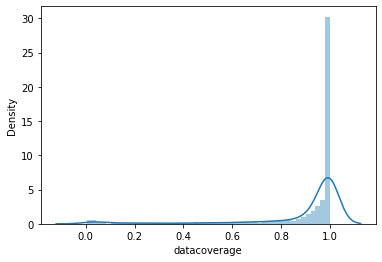

In [39]:
sns.distplot(df_stations["datacoverage"])
plt.show()

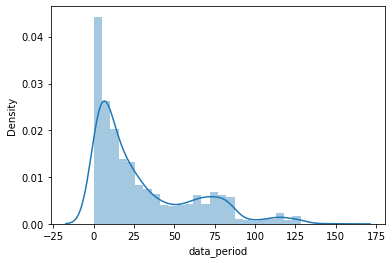

In [40]:
sns.distplot(df_stations["data_period"])
plt.show()

In [89]:
df_stations[df_stations["station_id"]=="AG000060390"]

,index,station_id,latitude,longitude,datacoverage,mindate,maxdate,min_year,max_year,data_period


In [42]:
import pickle

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# DECODING REQUEST

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00023129&startdate=2015-01-01&enddate=2015-12-31

**HEAD:**  
https://www.ncdc.noaa.gov/cdo-web/api/v2/

**REQUESTING DATA:** 
data?

**DATASET_ID:** 
datasetid=GHCND (Daily)
datasetid=GSOM (Global summary of the month)

**DATATYPE_ID TEMP:**
&datatypeid=TAVG

**DATATYPE_ID PRCP (1/2):**
&datatypeid=HPCP ('HPCP': 'Precipitation')

**DATATYPE_ID PRCP (2/2):**
&datatypeid=DWPR ('DWPR': 'Number of days with non-zero precipitation included in multiday precipitation total (MDPR))

**DATATYPE_ID WIND (1/2):**
&datatypeid=AWND ('AWND': 'Average wind speed')

**DATATYPE_ID WIND (2/2):**
&datatypeid=DAWM ('DAWM': 'Number of days included in the multiday wind movement (MDWM)')

**DATATYPE_ID EVAP (1/2):**
&datatypeid=DAEV ('DAEV': 'Number of days included in the multiday evaporation total (MDEV)')

**DATATYPE_ID EVAP (2/2):**
&datatypeid=TEVP ('TEVP': 'Total monthly evaporation.')

**DATATYPE_ID COMP (1/4):**
&datatypeid=DPNP ('DPNP': 'Departure from normal monthly precipitation.')

**DATATYPE_ID COMP (2/4):**
&datatypeid=DPNT ('DPNT': 'Departure from normal monthly temperature.')

**DATATYPE_ID COMP (3/4):**
&datatypeid=HTDD ('HTDD': 'Heating degree days')

**DATATYPE_ID COMP (4/4):**
&datatypeid=DX90 ('DX90': 'Number days with maximum temperature > 90 F (32.2C)')

**LIMIT**
&limit=1000

**OFFSET** 
&offset=1000 (ATTENTION: Have to find a clever way to count here)

**stationid**
&stationid=GHCND:USW00023129

OR

**locations**
&locations=FIPS:06001

**start & end date** (MANDATORY)
&startdate=2015-01-01&enddate=2015-12-31
        
        
        
        
        

In [92]:
#CA_counties
#60390

In [235]:
head=["https://www.ncdc.noaa.gov/cdo-web/api/v2/data?"]
#[daily, monthly]
dataset_id=["datasetid=GHCND","datasetid=GSOM"]

all_datatype_id=["&datatypeid=TAVG","&datatypeid=HPCP","&datatypeid=DWPR","&datatypeid=AWND",
            "&datatypeid=DAWM","&datatypeid=DAEV","&datatypeid=TEVP","&datatypeid=DPNP",
            "&datatypeid=DPNT","&datatypeid=HTDD","&datatypeid=DX90"]

prio1_datatype_id=["&datatypeid=TAVG","&datatypeid=HPCP","&datatypeid=AWND","&datatypeid=TEVP"]

limit=["&limit=1000"] 

offset=["&offset=1000","&offset=2000","&offset=3000","&offset=4000","&offset=5000"]

locations_prep=list(CA_counties["fibs"])
locations=[]

for i in range(len(locations_prep)):
    locations.append("&locationid="+locations_prep[i])   

startdate=["&startdate=1991-01-01"]

enddate=["&enddate=1991-01-01"]



In [67]:
url=head[0]+dataset_id[0]+prio1_datatype_id[0]+limit[0]+locations[0]+startdate[0]+enddate[0]
url

'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&locations=FIPS:06001&startdate=1991-01-01&enddate=1992-01-01'

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00023129&startdate=2015-01-01&enddate=2015-12-31

# Test 1

In [70]:
startdate=["&startdate=1991-01-01"]

enddate=["&enddate=1991-01-01"]

url=head[0]+dataset_id[1]+prio1_datatype_id[0]+limit[0]+locations[0]+startdate[0]+enddate[0]
url

'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06001&startdate=1991-01-01&enddate=1991-01-01'

In [71]:
#Test for 1 day is working

r = requests.get(url, headers={'token':token})
#load the api response as a json
alameda_county_temp = r.json()

In [72]:
alameda_county_temp

{'metadata': {'resultset': {'offset': 1, 'count': 4, 'limit': 1000}},
 'results': [{'date': '1991-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00044997',
   'attributes': '1,0',
   'value': 8.82},
  {'date': '1991-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00046144',
   'attributes': ',0',
   'value': 9.4},
  {'date': '1991-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USR0000CLVR',
   'attributes': ',U',
   'value': 9.59},
  {'date': '1991-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023239',
   'attributes': ',X',
   'value': 10.91}]}

# Test 2

Is working for first day of each month for first 1000 weather stations. For the first approach this is enough. Will limit California to this amount of sations (4457 means 

In [95]:
location_test=["&locationid=FIPS:06"]

start_end=["&start","&end"]

date=["date=1992-01-01"]

url=head[0]+dataset_id[1]+prio1_datatype_id[0]+limit[0]+location_test[0]+start_end[0]+date[0]+start_end[1]+date[0]
url

'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01'

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00023129&startdate=2015-01-01&enddate=2015-12-31

In [101]:
#Test for 1 day is working

#r = requests.get(url, headers={'token':token})
#load the api response as a json
#CA_temp_9201 = r.json()

In [ ]:
r = requests.get(url, headers={'token':token})

In [97]:
CA_temp_9201

{'metadata': {'resultset': {'offset': 1, 'count': 381, 'limit': 1000}},
 'results': [{'date': '1992-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00026250',
   'attributes': '1,0',
   'value': 12.43},
  {'date': '1992-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00040161',
   'attributes': '3,0',
   'value': 0.42},
  {'date': '1992-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00040192',
   'attributes': ',0',
   'value': 15.54},
  {'date': '1992-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00040212',
   'attributes': '1,0',
   'value': 8.15},
  {'date': '1992-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00040232',
   'attributes': ',0',
   'value': 5.72},
  {'date': '1992-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00040343',
   'attributes': '1,0',
   'value': 7.6},
  {'date': '1992-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USC00040379',
   'attributes':

In [135]:
len(CA_temp_9201["results"])

381

In [132]:
from datetime import datetime

In [133]:
temps = []
dates_temp = []
station=[]

avg_temps = [item for item in CA_temp_9201['results'] if item['datatype']=='TAVG']
#get the station_id from all average temperature readings
station += [item['station'] for item in avg_temps]
#get the date field from all average temperature readings
dates_temp += [item['date'] for item in avg_temps]
#get the actual average temperature from all average temperature readings
temps += [item['value'] for item in avg_temps]

#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['station_id'] = [s for s in station]
df_temp['date'] = [datetime.strptime(CA_temp_9201, "%Y-%m-%dT%H:%M:%S") for CA_temp_9201 in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]



In [134]:
len(station)

381

In [87]:
df_temp

,station_id,date,avgTemp
0,GHCND:AG000060390,1992-01-01,33.7676
1,GHCND:AG000060590,1992-01-01,33.5462
2,GHCND:AG000060611,1992-01-01,33.6362
3,GHCND:AG000060680,1992-01-01,33.9980
4,GHCND:AGE00147718,1992-01-01,33.7730
...,...,...,...
995,GHCND:CA001165030,1992-01-01,31.8596
996,GHCND:CA001165791,1992-01-01,31.7336
997,GHCND:CA001165793,1992-01-01,31.6940
998,GHCND:CA001166527,1992-01-01,32.1944


In [136]:
avg_temps = [item for item in CA_temp_9201['results'] if item['datatype']=='TAVG']
#get the station_id from all average temperature readings
station += [item['station'] for item in avg_temps]
#get the date field from all average temperature readings
dates_temp += [item['date'] for item in avg_temps]
#get the actual average temperature from all average temperature readings
temps += [item['value'] for item in avg_temps]   #populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)

In [137]:
len(station)

762

Monthly summary is only available at the first of every month, list with 01/MM/YY needed

# Scraping Temperatur 1992-2004

In [177]:
#first decade (1992-2004)
from datetime import date, timedelta

dates_test=pd.date_range('1992-01-01','2004-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test)

145

In [180]:
#second decade (2004-2016)
from datetime import date, timedelta

dates_test2=pd.date_range('2004-01-01','2016-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test2)

145

In [121]:
import time
from random import randint

random_i = randint(5, 10)
time.sleep(random_i)

In [273]:
head=["https://www.ncdc.noaa.gov/cdo-web/api/v2/data?"]
#[daily, monthly]
dataset_id=["datasetid=GHCND","datasetid=GSOM"]

all_datatype_id=["&datatypeid=TAVG","&datatypeid=HPCP","&datatypeid=DWPR","&datatypeid=AWND",
            "&datatypeid=DAWM","&datatypeid=DAEV","&datatypeid=TEVP","&datatypeid=DPNP",
            "&datatypeid=DPNT","&datatypeid=HTDD","&datatypeid=DX90"]

prio1_datatype_id=["&datatypeid=TAVG","&datatypeid=PRCP","&datatypeid=AWND","&datatypeid=EVAP"]

limit=["&limit=1000"] 

offset=["&offset=1000","&offset=2000","&offset=3000","&offset=4000","&offset=5000"]


location_test=["&locationid=FIPS:06"]

start_end=["&startdate=","&enddate="]

#1992-01-01 until 2004-01-01
dates=dates_test

    

In [184]:
temp_dic=[]

#list has to keep growing
temps = []
dates_temp = []
station=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[0]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_temp_"+str(i)
    name = r.json()
    temp_dic.append(name)

    avg_temps = [item for item in name['results'] if item['datatype']=='TAVG']
    #get the station_id from all average temperature readings
    station += [item['station'] for item in avg_temps]
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1992-02-01&enddate=1992-02-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1992-02-01&enddate=1992-02-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1992-03-01&enddate=1992-03-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1992-04-01&enddate=1992-04-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1992

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1995-11-01&enddate=1995-11-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1995-12-01&enddate=1995-12-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1996-01-01&enddate=1996-01-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1996-02-01&enddate=1996-02-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1996-03-01&enddate=1996-03-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1999-10-01&enddate=1999-10-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1999-11-01&enddate=1999-11-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1999-12-01&enddate=1999-12-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2000-01-01&enddate=2000-01-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2000-02-01&enddate=2000-02-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid

<Response [200]>
loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2003-09-01&enddate=2003-09-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2003-10-01&enddate=2003-10-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2003-11-01&enddate=2003-11-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2003-12-01&enddate=2003-12-01

<Response [200]>


In [185]:
len(temp_dic)

145

In [186]:
from datetime import datetime

#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['station_id'] = [s for s in station]
df_temp['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]

In [190]:
df_temp_1=df_temp
df_temp_1.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_1992_2004.csv")

print("Sucessfully safed")

Sucessfully safed


In [194]:
df_temp_1

,station_id,date,avgTemp
0,GHCND:USC00026250,1992-01-01,34.2374
1,GHCND:USC00040161,1992-01-01,32.0756
2,GHCND:USC00040192,1992-01-01,34.7972
3,GHCND:USC00040212,1992-01-01,33.4670
4,GHCND:USC00040232,1992-01-01,33.0296
...,...,...,...
70885,GHCND:USW00093228,2004-01-01,33.8216
70886,GHCND:USW00093230,2004-01-01,31.5680
70887,GHCND:USW00093241,2004-01-01,33.4274
70888,GHCND:USW00093242,2004-01-01,33.3500


# Automating request

1992-2004 = dates_test

2004-2016 = dates_test2

# Scraping Temperatur 2004-2016

In [302]:
#2004-01-01 until 2016-01-01
dates=dates_test2

In [303]:
temp_dic2=[]

#list has to keep growing
temps2 = []
dates_temp2 = []
station2=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[0]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_temp_"+str(i)
    name = r.json()
    temp_dic2.append(name)

    avg_temps = [item for item in name['results'] if item['datatype']=='TAVG']
    #get the station_id from all average temperature readings
    station2 += [item['station'] for item in avg_temps]
    #get the date field from all average temperature readings
    dates_temp2 += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps2 += [item['value'] for item in avg_temps]
    
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2004-01-01&enddate=2004-01-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2004-02-01&enddate=2004-02-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2004-03-01&enddate=2004-03-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2004-04-01&enddate=2004-04-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2004

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2007-11-01&enddate=2007-11-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2007-12-01&enddate=2007-12-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2008-01-01&enddate=2008-01-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2008-02-01&enddate=2008-02-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2008-03-01&enddate=2008-03-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2011-10-01&enddate=2011-10-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2011-11-01&enddate=2011-11-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2011-12-01&enddate=2011-12-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2012-01-01&enddate=2012-01-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2012-02-01&enddate=2012-02-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid

<Response [200]>
loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2015-09-01&enddate=2015-09-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2015-10-01&enddate=2015-10-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2015-11-01&enddate=2015-11-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2015-12-01&enddate=2015-12-01

<Response [200]>


In [304]:
len(temp_dic2)

145

In [306]:
from datetime import datetime

#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['station_id'] = [s for s in station2]
df_temp['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp2]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps2]

df_temp

,station_id,date,avgTemp
0,GHCND:USC00040029,2004-01-01,32.3546
1,GHCND:USC00040136,2004-01-01,34.2644
2,GHCND:USC00040161,2004-01-01,32.0198
3,GHCND:USC00040192,2004-01-01,34.7216
4,GHCND:USC00040212,2004-01-01,33.2672
...,...,...,...
87513,GHCND:USW00093241,2016-01-01,33.8414
87514,GHCND:USW00093242,2016-01-01,33.8126
87515,GHCND:USW00093243,2016-01-01,33.6002
87516,GHCND:USW00093245,2016-01-01,33.9728


In [307]:
df_temp_2=df_temp
#df_temp_2.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_2004_2016.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping Temperatur 2016-2021

In [363]:
dates_test3=pd.date_range('2016-01-01','2021-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test3)

#2016-01-01 until 2021-01-01
dates=dates_test3

In [365]:
#dates

In [366]:
temp_dic3=[]

#list has to keep growing
temps3 = []
dates_temp3 = []
station3=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[0]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_temp_"+str(i)
    name = r.json()
    temp_dic3.append(name)

    avg_temps = [item for item in name['results'] if item['datatype']=='TAVG']
    #get the station_id from all average temperature readings
    station3 += [item['station'] for item in avg_temps]
    #get the date field from all average temperature readings
    dates_temp3 += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps3 += [item['value'] for item in avg_temps]
    
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2016-02-01&enddate=2016-02-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2016-03-01&enddate=2016-03-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2016-04-01&enddate=2016-04-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2016

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2019-11-01&enddate=2019-11-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2019-12-01&enddate=2019-12-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2020-01-01&enddate=2020-01-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2020-02-01&enddate=2020-02-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2020-03-01&enddate=2020-03-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid

In [367]:
len(temp_dic3)

61

In [368]:
from datetime import datetime

#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['station_id'] = [s for s in station3]
df_temp['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp3]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps3]

df_temp

,station_id,date,avgTemp
0,GHCND:USC00040136,2016-01-01,33.9404
1,GHCND:USC00040176,2016-01-01,33.9944
2,GHCND:USC00040192,2016-01-01,34.6910
3,GHCND:USC00040212,2016-01-01,33.3464
4,GHCND:USC00040232,2016-01-01,33.9188
...,...,...,...
34134,GHCND:USW00093230,2021-01-01,31.9856
34135,GHCND:USW00093241,2021-01-01,33.7640
34136,GHCND:USW00093243,2021-01-01,33.5390
34137,GHCND:USW00093245,2021-01-01,33.8108


In [369]:
df_temp_3=df_temp
df_temp_3.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_2016_2021.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping Temperatur 1975 - 1992

In [370]:
dates_test0=pd.date_range('1975-01-01','1992-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test0)

205

In [372]:
dates=dates_test0
#dates

In [373]:
temp_dic0=[]

#list has to keep growing
temps0 = []
dates_temp0 = []
station0=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[0]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_temp_"+str(i)
    name = r.json()
    temp_dic3.append(name)

    avg_temps = [item for item in name['results'] if item['datatype']=='TAVG']
    #get the station_id from all average temperature readings
    station0 += [item['station'] for item in avg_temps]
    #get the date field from all average temperature readings
    dates_temp0 += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps0 += [item['value'] for item in avg_temps]
    
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2021-01-01&enddate=2021-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1975-01-01&enddate=1975-01-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1975-02-01&enddate=1975-02-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1975-03-01&enddate=1975-03-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1975-04-01&enddate=1975-04-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1975

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1978-11-01&enddate=1978-11-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1978-12-01&enddate=1978-12-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1979-01-01&enddate=1979-01-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1979-02-01&enddate=1979-02-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1979-03-01&enddate=1979-03-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1982-10-01&enddate=1982-10-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1982-11-01&enddate=1982-11-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1982-12-01&enddate=1982-12-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1983-01-01&enddate=1983-01-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1983-02-01&enddate=1983-02-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid

<Response [200]>
loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1986-09-01&enddate=1986-09-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1986-10-01&enddate=1986-10-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1986-11-01&enddate=1986-11-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1986-12-01&enddate=1986-12-01

<Response [200]>
loop:  145
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1987-01-01&enddate=1987-01-01

<Response [200]>
loop:  146
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&loca

<Response [200]>
loop:  188
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1990-08-01&enddate=1990-08-01

<Response [200]>
loop:  189
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1990-09-01&enddate=1990-09-01

<Response [200]>
loop:  190
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1990-10-01&enddate=1990-10-01

<Response [200]>
loop:  191
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1990-11-01&enddate=1990-11-01

<Response [200]>
loop:  192
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=1990-12-01&enddate=1990-12-01

<Response [200]>
loop:  193
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&loca

In [375]:
len(temp_dic3)

266

In [376]:

#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['station_id'] = [s for s in station0]
df_temp['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp0]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps0]

df_temp

,station_id,date,avgTemp
0,GHCND:USC00026250,1975-01-01,33.9746
1,GHCND:USC00040029,1975-01-01,31.9064
2,GHCND:USC00040088,1975-01-01,33.2924
3,GHCND:USC00040136,1975-01-01,34.4876
4,GHCND:USC00040161,1975-01-01,31.4240
...,...,...,...
63310,GHCND:USW00093114,1992-01-01,34.6406
63311,GHCND:USW00093134,1992-01-01,34.8188
63312,GHCND:USW00093193,1992-01-01,33.0674
63313,GHCND:USW00093209,1992-01-01,33.5210


In [377]:
df_temp_0=df_temp
df_temp_0.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_1975_1992.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping PERCIPITATION 1975-1992

In [394]:
dates_test0=pd.date_range('1975-01-01','1992-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test0)

205

In [396]:
dates=dates_test0
#dates

In [397]:
PRCP_dic0=[]

#list has to keep growing
PRCP0 = []
dates_temp0 = []
station0=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[1]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_perc_"+str(i)
    name = r.json()
    PRCP_dic0.append(name)

    avg_PRCP = [item for item in name['results'] if item['datatype']=='PRCP']
    #get the station_id from all average PRCP readings
    station0 += [item['station'] for item in avg_PRCP]
    #get the date field from all average PRCP readings
    dates_temp0 += [item['date'] for item in avg_PRCP]
    #get the actual average temperature from all average PRCP readings
    PRCP0 += [item['value'] for item in avg_PRCP]

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2021-01-01&enddate=2021-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1975-01-01&enddate=1975-01-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1975-02-01&enddate=1975-02-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1975-03-01&enddate=1975-03-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1975-04-01&enddate=1975-04-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1975

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1978-11-01&enddate=1978-11-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1978-12-01&enddate=1978-12-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1979-01-01&enddate=1979-01-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1979-02-01&enddate=1979-02-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1979-03-01&enddate=1979-03-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1982-10-01&enddate=1982-10-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1982-11-01&enddate=1982-11-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1982-12-01&enddate=1982-12-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1983-01-01&enddate=1983-01-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1983-02-01&enddate=1983-02-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid

<Response [200]>
loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1986-09-01&enddate=1986-09-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1986-10-01&enddate=1986-10-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1986-11-01&enddate=1986-11-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1986-12-01&enddate=1986-12-01

<Response [200]>
loop:  145
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1987-01-01&enddate=1987-01-01

<Response [200]>
loop:  146
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&loca

<Response [200]>
loop:  188
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1990-08-01&enddate=1990-08-01

<Response [200]>
loop:  189
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1990-09-01&enddate=1990-09-01

<Response [200]>
loop:  190
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1990-10-01&enddate=1990-10-01

<Response [200]>
loop:  191
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1990-11-01&enddate=1990-11-01

<Response [200]>
loop:  192
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1990-12-01&enddate=1990-12-01

<Response [200]>
loop:  193
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&loca

In [398]:
#initialize dataframe
df_perc = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_perc['station_id'] = [s for s in station0]
df_perc['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp0]
df_perc['avgPerc'] = [v for v in PRCP0]

df_perc

,station_id,date,avgPerc
0,GHCND:USC00026250,1975-01-01,0.8
1,GHCND:USC00040014,1975-01-01,5.6
2,GHCND:USC00040024,1975-01-01,0.8
3,GHCND:USC00040029,1975-01-01,14.2
4,GHCND:USC00040064,1975-01-01,47.0
...,...,...,...
94818,GHCND:USW00093112,1992-01-01,43.4
94819,GHCND:USW00093114,1992-01-01,52.2
94820,GHCND:USW00093134,1992-01-01,44.3
94821,GHCND:USW00093193,1992-01-01,49.3


In [399]:
df_perc_0=df_perc
df_perc_0.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_1975_1992.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping PERCIPITATION 1992-2004

prio1_datatype_id[1]

In [ ]:
prio1_datatype_id[1]

### TEST

In [ ]:
#url=https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01
#url

In [ ]:
#r = requests.get(url, headers={'token':token})
#load the api response as a json
#test = r.json()
#test

In [308]:
#1992-01-01 until 2004-01-01
dates=dates_test

In [309]:
PRCP_dic=[]

#list has to keep growing
PRCP = []
dates_temp = []
station=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[1]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_perc_"+str(i)
    name = r.json()
    PRCP_dic.append(name)

    avg_PRCP = [item for item in name['results'] if item['datatype']=='PRCP']
    #get the station_id from all average PRCP readings
    station += [item['station'] for item in avg_PRCP]
    #get the date field from all average PRCP readings
    dates_temp += [item['date'] for item in avg_PRCP]
    #get the actual average temperature from all average PRCP readings
    PRCP += [item['value'] for item in avg_PRCP]

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=TAVG&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1992-02-01&enddate=1992-02-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1992-03-01&enddate=1992-03-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1992-04-01&enddate=1992-04-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1992

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1995-11-01&enddate=1995-11-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1995-12-01&enddate=1995-12-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1996-01-01&enddate=1996-01-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1996-02-01&enddate=1996-02-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1996-03-01&enddate=1996-03-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1999-10-01&enddate=1999-10-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1999-11-01&enddate=1999-11-01



ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [310]:
#initialize dataframe
df_perc = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_perc['station_id'] = [s for s in station]
df_perc['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp]
df_perc['avgPerc'] = [v for v in PRCP]

In [311]:
df_perc

,station_id,date,avgPerc
0,GHCND:USC00026250,1992-01-01,22.5
1,GHCND:USC00040014,1992-01-01,68.6
2,GHCND:USC00040029,1992-01-01,5.3
3,GHCND:USC00040136,1992-01-01,102.8
4,GHCND:USC00040144,1992-01-01,79.2
...,...,...,...
40071,GHCND:USW00093227,1999-11-01,63.6
40072,GHCND:USW00093228,1999-11-01,43.2
40073,GHCND:USW00093241,1999-11-01,48.4
40074,GHCND:USW00093242,1999-11-01,16.9


In [312]:
df_perc_1=df_perc
df_perc_1.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_1992_1999-11.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping PERCIPITATION after error I

1999-12-01 - 2004-01-01


In [346]:
prio1_datatype_id[1]

'&datatypeid=PRCP'

In [347]:
#1999-12-01 - 2004-01-01
#from datetime import date, timedelta

dates_test3=pd.date_range('1999-12-01','2004-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
print(len(dates_test3))


dates=dates_test3

50


In [349]:
#dates

In [350]:
PRCP_dic3=[]

#list has to keep growing
PRCP3 = []
dates_temp3 = []
station3=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[1]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_perc_"+str(i)
    name = r.json()
    PRCP_dic3.append(name)

    avg_PRCP = [item for item in name['results'] if item['datatype']=='PRCP']
    #get the station_id from all average PRCP readings
    station3 += [item['station'] for item in avg_PRCP]
    #get the date field from all average PRCP readings
    dates_temp3 += [item['date'] for item in avg_PRCP]
    #get the actual average temperature from all average PRCP readings
    PRCP3 += [item['value'] for item in avg_PRCP]
    
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1999-12-01&enddate=1999-12-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2000-01-01&enddate=2000-01-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2000-02-01&enddate=2000-02-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2000-03-01&enddate=2000-03-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2000

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2003-10-01&enddate=2003-10-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2003-11-01&enddate=2003-11-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2003-12-01&enddate=2003-12-01

<Response [200]>


In [351]:
#initialize dataframe
df_perc3 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_perc3['station_id'] = [s for s in station3]
df_perc3['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp3]
df_perc3['avgPerc'] = [v for v in PRCP3]

df_perc3

,station_id,date,avgPerc
0,GHCND:USC00026250,1999-12-01,0.0
1,GHCND:USC00040010,1999-12-01,6.1
2,GHCND:USC00040014,1999-12-01,0.0
3,GHCND:USC00040029,1999-12-01,13.8
4,GHCND:USC00040136,1999-12-01,15.5
...,...,...,...
22382,GHCND:USW00093228,2004-01-01,43.9
22383,GHCND:USW00093230,2004-01-01,31.4
22384,GHCND:USW00093241,2004-01-01,90.2
22385,GHCND:USW00093242,2004-01-01,20.7


In [352]:
df_perc_3=df_perc3
df_perc_3.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_1999-12_2004.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping PERCIPITATION 2004-2016

prio1_datatype_id[1]

In [313]:
prio1_datatype_id[1]

'&datatypeid=PRCP'

In [314]:
#2004-01-01 until 2016-01-01
dates=dates_test2

In [315]:
PRCP_dic2=[]

#list has to keep growing
PRCP2 = []
dates_temp2 = []
station2=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    print("loop: ",i)
    print(url)
    print()
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[1]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_perc_"+str(i)
    name = r.json()
    PRCP_dic2.append(name)

    avg_PRCP = [item for item in name['results'] if item['datatype']=='PRCP']
    #get the station_id from all average PRCP readings
    station2 += [item['station'] for item in avg_PRCP]
    #get the date field from all average PRCP readings
    dates_temp2 += [item['date'] for item in avg_PRCP]
    #get the actual average temperature from all average PRCP readings
    PRCP2 += [item['value'] for item in avg_PRCP]

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=1999-12-01&enddate=1999-12-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2004-01-01&enddate=2004-01-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2004-02-01&enddate=2004-02-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2004-03-01&enddate=2004-03-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2004-04-01&enddate=2004-04-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2004

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2007-11-01&enddate=2007-11-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2007-12-01&enddate=2007-12-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2008-01-01&enddate=2008-01-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2008-02-01&enddate=2008-02-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2008-03-01&enddate=2008-03-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2011-10-01&enddate=2011-10-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2011-11-01&enddate=2011-11-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2011-12-01&enddate=2011-12-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012-01-01&enddate=2012-01-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012-02-01&enddate=2012-02-01



ChunkedEncodingError: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))

In [316]:
#initialize dataframe
df_perc2 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_perc2['station_id'] = [s for s in station2]
df_perc2['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp2]
df_perc2['avgPerc'] = [v for v in PRCP2]

In [317]:
df_perc2

,station_id,date,avgPerc
0,GHCND:USC00026250,2004-01-01,0.0
1,GHCND:USC00040010,2004-01-01,60.2
2,GHCND:USC00040014,2004-01-01,1.0
3,GHCND:USC00040029,2004-01-01,28.5
4,GHCND:USC00040136,2004-01-01,5.3
...,...,...,...
51262,GHCND:USW00093241,2012-02-01,32.2
51263,GHCND:USW00093242,2012-02-01,9.4
51264,GHCND:USW00093243,2012-02-01,5.7
51265,GHCND:USW00093245,2012-02-01,37.9


In [318]:
df_perc_2=df_perc2
df_perc_2.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_2004_2012-02.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping PERCIPITATION after error II

2012-03-01 - 2016-01-01

In [353]:
prio1_datatype_id[1]

'&datatypeid=PRCP'

In [354]:
#2012-03-01 - 2016-01-01
#from datetime import date, timedelta

dates_test4=pd.date_range('2012-03-01','2016-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
print(len(dates_test4))


dates=dates_test4

47


In [356]:
#dates

In [357]:
PRCP_dic4=[]

#list has to keep growing
PRCP4 = []
dates_temp4 = []
station4=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[1]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    print("loop: ",i)
    print(url)
    print()
    
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_perc_"+str(i)
    name = r.json()
    PRCP_dic4.append(name)

    avg_PRCP = [item for item in name['results'] if item['datatype']=='PRCP']
    #get the station_id from all average PRCP readings
    station4 += [item['station'] for item in avg_PRCP]
    #get the date field from all average PRCP readings
    dates_temp4 += [item['date'] for item in avg_PRCP]
    #get the actual average temperature from all average PRCP readings
    PRCP4 += [item['value'] for item in avg_PRCP]
    
    
 

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012-03-01&enddate=2012-03-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012-04-01&enddate=2012-04-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012-05-01&enddate=2012-05-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012-06-01&enddate=2012-06-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012-07-01&enddate=2012-07-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2012

<Response [200]>


In [358]:
#initialize dataframe
df_perc4 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_perc4['station_id'] = [s for s in station4]
df_perc4['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp4]
df_perc4['avgPerc'] = [v for v in PRCP4]

df_perc4

,station_id,date,avgPerc
0,GHCND:US1CAAL0001,2012-03-01,220.4
1,GHCND:US1CAAL0003,2012-03-01,138.2
2,GHCND:US1CAAL0007,2012-03-01,72.7
3,GHCND:US1CAAL0008,2012-03-01,207.6
4,GHCND:US1CAAL0012,2012-03-01,98.3
...,...,...,...
34891,GHCND:USW00093241,2016-01-01,214.6
34892,GHCND:USW00093242,2016-01-01,92.3
34893,GHCND:USW00093243,2016-01-01,107.2
34894,GHCND:USW00093245,2016-01-01,184.3


In [359]:
df_perc_4=df_perc4
df_perc_4.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_2012-03_2016.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping PERCIPITATION 2016-2021

prio1_datatype_id[1]

In [388]:
dates_test3=pd.date_range('2016-01-01','2021-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test3)

61

In [390]:
#2016-01-01 until 2021-01-01
dates=dates_test3
#dates

In [391]:
PRCP_dic5=[]

#list has to keep growing
PRCP5 = []
dates_temp5 = []
station5=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[1]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    print("loop: ",i)
    print(url)
    print()
    
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_perc_"+str(i)
    name = r.json()
    PRCP_dic5.append(name)

    avg_PRCP = [item for item in name['results'] if item['datatype']=='PRCP']
    #get the station_id from all average PRCP readings
    station5 += [item['station'] for item in avg_PRCP]
    #get the date field from all average PRCP readings
    dates_temp5 += [item['date'] for item in avg_PRCP]
    #get the actual average temperature from all average PRCP readings
    PRCP5 += [item['value'] for item in avg_PRCP]
    
    
 

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2016-02-01&enddate=2016-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2016-03-01&enddate=2016-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2016-04-01&enddate=2016-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2016-05-01&enddate=2016-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2016

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2019-12-01&enddate=2019-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2020-01-01&enddate=2020-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2020-02-01&enddate=2020-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2020-03-01&enddate=2020-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid=FIPS:06&startdate=2020-04-01&enddate=2020-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=PRCP&limit=1000&locationid

In [392]:
#initialize dataframe
df_perc5 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_perc5['station_id'] = [s for s in station5]
df_perc5['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp5]
df_perc5['avgPerc'] = [v for v in PRCP5]

df_perc5

,station_id,date,avgPerc
0,GHCND:US1CAAL0001,2016-01-01,220.2
1,GHCND:US1CAAL0003,2016-01-01,146.9
2,GHCND:US1CAAL0004,2016-01-01,122.1
3,GHCND:US1CAAL0007,2016-01-01,117.8
4,GHCND:US1CAAL0011,2016-01-01,131.2
...,...,...,...
46645,GHCND:USW00093241,2021-01-01,71.9
46646,GHCND:USW00093242,2021-01-01,7.1
46647,GHCND:USW00093243,2021-01-01,89.4
46648,GHCND:USW00093245,2021-01-01,100.2


In [393]:
df_perc_5=df_perc5
df_perc_5.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_2016_2021.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping WIND 1985-1992

prio1_datatype_id[2]

In [403]:
prio1_datatype_id[2]

'&datatypeid=AWND'

In [415]:
dates_test0=pd.date_range('1985-01-01','1992-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test0)

85

In [416]:
dates=dates_test0
#dates

In [417]:
WIND_dic0=[]

#list has to keep growing
WIND0 = []
dates_temp0 = []
station0=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[2]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    print("loop: ",i)
    print(url)
    print()
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_wind_"+str(i)
    name = r.json()
    WIND_dic0.append(name)

    avg_WIND = [item for item in name['results'] if item['datatype']=='AWND']
    #get the station_id from all average WIND readings
    station0 += [item['station'] for item in avg_WIND]
    #get the date field from all average WIND readings
    dates_temp0 += [item['date'] for item in avg_WIND]
    #get the actual average temperature from all average WIND readings
    WIND0 += [item['value'] for item in avg_WIND]
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1985-01-01&enddate=1985-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1985-02-01&enddate=1985-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1985-03-01&enddate=1985-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1985-04-01&enddate=1985-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1985-05-01&enddate=1985-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1985

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1988-12-01&enddate=1988-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1989-01-01&enddate=1989-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1989-02-01&enddate=1989-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1989-03-01&enddate=1989-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1989-04-01&enddate=1989-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid

In [418]:
#initialize dataframe
df_wind = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_wind['station_id'] = [s for s in station0]
df_wind['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp0]
df_wind['avgWind'] = [v for v in WIND0]

df_wind

,station_id,date,avgWind
0,GHCND:USW00023129,1985-01-01,2.3
1,GHCND:USW00023155,1985-01-01,2.3
2,GHCND:USW00023157,1985-01-01,3.6
3,GHCND:USW00023174,1985-01-01,2.8
4,GHCND:USW00023188,1985-01-01,3.4
...,...,...,...
1648,GHCND:USW00093107,1992-01-01,1.3
1649,GHCND:USW00093111,1992-01-01,4.4
1650,GHCND:USW00093112,1992-01-01,2.0
1651,GHCND:USW00093114,1992-01-01,1.4


In [419]:
df_wind_0=df_wind
df_wind_0.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_1985_1992.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping WIND 1992-2004

prio1_datatype_id[2]

In [ ]:
prio1_datatype_id[2]

### TEST

In [ ]:
#url="https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01"
#url

In [ ]:
#r = requests.get(url, headers={'token':token})
#load the api response as a json
#test = r.json()
#test

In [319]:
#1992-01-01 until 2004-01-01
dates=dates_test

In [320]:
#dates_test

In [321]:
WIND_dic=[]

#list has to keep growing
WIND = []
dates_temp = []
station=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[2]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    print("loop: ",i)
    print(url)
    print()
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_wind_"+str(i)
    name = r.json()
    WIND_dic.append(name)

    avg_WIND = [item for item in name['results'] if item['datatype']=='AWND']
    #get the station_id from all average WIND readings
    station += [item['station'] for item in avg_WIND]
    #get the date field from all average WIND readings
    dates_temp += [item['date'] for item in avg_WIND]
    #get the actual average temperature from all average WIND readings
    WIND += [item['value'] for item in avg_WIND]
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1992-02-01&enddate=1992-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1992-03-01&enddate=1992-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1992-04-01&enddate=1992-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1992-05-01&enddate=1992-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1992

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1995-12-01&enddate=1995-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1996-01-01&enddate=1996-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1996-02-01&enddate=1996-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1996-03-01&enddate=1996-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1996-04-01&enddate=1996-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1999-11-01&enddate=1999-11-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=1999-12-01&enddate=1999-12-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2000-01-01&enddate=2000-01-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2000-02-01&enddate=2000-02-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2000-03-01&enddate=2000-03-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid

<Response [200]>
loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2003-10-01&enddate=2003-10-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2003-11-01&enddate=2003-11-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2003-12-01&enddate=2003-12-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2004-01-01&enddate=2004-01-01

<Response [200]>


In [322]:
#initialize dataframe
df_wind = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_wind['station_id'] = [s for s in station]
df_wind['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp]
df_wind['avgWind'] = [v for v in WIND]

In [323]:
df_wind

,station_id,date,avgWind
0,GHCND:USW00003154,1992-01-01,2.1
1,GHCND:USW00023110,1992-01-01,1.3
2,GHCND:USW00023129,1992-01-01,2.6
3,GHCND:USW00023155,1992-01-01,2.7
4,GHCND:USW00023161,1992-01-01,3.5
...,...,...,...
6230,GHCND:USW00093228,2004-01-01,2.4
6231,GHCND:USW00093230,2004-01-01,2.2
6232,GHCND:USW00093241,2004-01-01,1.6
6233,GHCND:USW00093242,2004-01-01,2.1


In [324]:
df_wind_1=df_wind
df_wind_1.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_1992_2004.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping WIND 2004-2016

prio1_datatype_id[2]

In [325]:
prio1_datatype_id[2]

'&datatypeid=AWND'

In [326]:
#2004-01-01 until 2016-01-01
dates=dates_test2

In [327]:
WIND_dic2=[]

#list has to keep growing
WIND2 = []
dates_temp2 = []
station2=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[2]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    print("loop: ",i)
    print(url)
    print()
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_wind_"+str(i)
    name = r.json()
    WIND_dic2.append(name)

    avg_WIND = [item for item in name['results'] if item['datatype']=='AWND']
    #get the station_id from all average WIND readings
    station2 += [item['station'] for item in avg_WIND]
    #get the date field from all average WIND readings
    dates_temp2 += [item['date'] for item in avg_WIND]
    #get the actual average temperature from all average WIND readings
    WIND2 += [item['value'] for item in avg_WIND]

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2004-01-01&enddate=2004-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2004-02-01&enddate=2004-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2004-03-01&enddate=2004-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2004-04-01&enddate=2004-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2004-05-01&enddate=2004-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2004

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2007-12-01&enddate=2007-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2008-01-01&enddate=2008-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2008-02-01&enddate=2008-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2008-03-01&enddate=2008-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2008-04-01&enddate=2008-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2011-11-01&enddate=2011-11-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2011-12-01&enddate=2011-12-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2012-01-01&enddate=2012-01-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2012-02-01&enddate=2012-02-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2012-03-01&enddate=2012-03-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid

<Response [200]>
loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2015-10-01&enddate=2015-10-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2015-11-01&enddate=2015-11-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2015-12-01&enddate=2015-12-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>


In [328]:
#initialize dataframe
df_wind2 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_wind2['station_id'] = [s for s in station2]
df_wind2['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp2]
df_wind2['avgWind'] = [v for v in WIND2]

In [329]:
df_wind2

,station_id,date,avgWind
0,GHCND:USW00003102,2004-01-01,2.1
1,GHCND:USW00003104,2004-01-01,2.1
2,GHCND:USW00003131,2004-01-01,1.8
3,GHCND:USW00003144,2004-01-01,2.3
4,GHCND:USW00003159,2004-01-01,3.4
...,...,...,...
11153,GHCND:USW00093228,2016-01-01,2.9
11154,GHCND:USW00093230,2016-01-01,2.6
11155,GHCND:USW00093241,2016-01-01,2.0
11156,GHCND:USW00093242,2016-01-01,2.4


In [330]:
df_wind_2=df_wind2
df_wind_2.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_2004_2016.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping WIND 2016-2021

prio1_datatype_id[2]

In [420]:
dates_test3=pd.date_range('2016-01-01','2021-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test3)

61

In [422]:
dates=dates_test3
#dates

In [423]:
WIND_dic3=[]

#list has to keep growing
WIND3 = []
dates_temp3 = []
station3=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[2]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    print("loop: ",i)
    print(url)
    print()
    
    r = requests.get(url, headers={'token':token})
    print(r)
    #load the api response as a json
    name="CA_wind_"+str(i)
    name = r.json()
    WIND_dic3.append(name)

    avg_WIND = [item for item in name['results'] if item['datatype']=='AWND']
    #get the station_id from all average WIND readings
    station3 += [item['station'] for item in avg_WIND]
    #get the date field from all average WIND readings
    dates_temp3 += [item['date'] for item in avg_WIND]
    #get the actual average temperature from all average WIND readings
    WIND3 += [item['value'] for item in avg_WIND]
    
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2016-02-01&enddate=2016-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2016-03-01&enddate=2016-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2016-04-01&enddate=2016-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2016-05-01&enddate=2016-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2016

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2019-12-01&enddate=2019-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2020-01-01&enddate=2020-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2020-02-01&enddate=2020-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2020-03-01&enddate=2020-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid=FIPS:06&startdate=2020-04-01&enddate=2020-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=AWND&limit=1000&locationid

In [424]:
#initialize dataframe
df_wind3 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_wind3['station_id'] = [s for s in station3]
df_wind3['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp3]
df_wind3['avgWind'] = [v for v in WIND3]

df_wind3

,station_id,date,avgWind
0,GHCND:USS0019L42S,2016-01-01,2.1
1,GHCND:USS0020K05S,2016-01-01,0.9
2,GHCND:USS0020K30S,2016-01-01,3.9
3,GHCND:USW00003102,2016-01-01,1.6
4,GHCND:USW00003104,2016-01-01,1.9
...,...,...,...
4708,GHCND:USW00093228,2021-01-01,2.5
4709,GHCND:USW00093230,2021-01-01,2.4
4710,GHCND:USW00093241,2021-01-01,2.5
4711,GHCND:USW00093242,2021-01-01,2.2


In [425]:
df_wind_3=df_wind3
df_wind_3.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_2016_2021.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping TEVP 1985-1992


In [426]:
prio1_datatype_id[3]

'&datatypeid=EVAP'

In [427]:
dates_test0=pd.date_range('1985-01-01','1992-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test0)

85

In [429]:
dates=dates_test0
#dates

In [430]:
EVAP_dic0=[]

#list has to keep growing
EVAP0 = []
dates_temp0 = []
station0=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[3]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print("loop: ",i)
    print(url)
    print()
    
    print(r)
    #load the api response as a json
    name="CA_evap_"+str(i)
    name = r.json()
    EVAP_dic0.append(name)

    avg_EVAP = [item for item in name['results'] if item['datatype']=='EVAP']
    #get the station_id from all average WIND readings
    station0 += [item['station'] for item in avg_EVAP]
    #get the date field from all average WIND readings
    dates_temp0 += [item['date'] for item in avg_EVAP]
    #get the actual average temperature from all average WIND readings
    EVAP0 += [item['value'] for item in avg_EVAP]
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1985-01-01&enddate=1985-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1985-02-01&enddate=1985-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1985-03-01&enddate=1985-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1985-04-01&enddate=1985-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1985-05-01&enddate=1985-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1985

loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1988-12-01&enddate=1988-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1989-01-01&enddate=1989-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1989-02-01&enddate=1989-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1989-03-01&enddate=1989-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1989-04-01&enddate=1989-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdat

In [432]:
#initialize dataframe
df_evap = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_evap['station_id'] = [s for s in station0]
df_evap['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp0]
df_evap['avgEvap'] = [v for v in EVAP0]

In [433]:
df_evap

,station_id,date,avgEvap
0,GHCND:USC00041253,1985-01-01,50.3
1,GHCND:USC00042294,1985-01-01,22.4
2,GHCND:USC00042319,1985-01-01,103.4
3,GHCND:USC00043113,1985-01-01,9.8
4,GHCND:USC00043261,1985-01-01,16.5
...,...,...,...
1391,GHCND:USC00047846,1992-01-01,21.1
1392,GHCND:USC00048135,1992-01-01,29.9
1393,GHCND:USC00049026,1992-01-01,16.8
1394,GHCND:USC00049111,1992-01-01,85.0


In [434]:
df_evap_0=df_evap
df_evap_0.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_1985_1992.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping TEVP 1992-2004

prio1_datatype_id[3]

In [331]:
prio1_datatype_id[3]

'&datatypeid=EVAP'

In [ ]:
#url="https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01"
#url

In [ ]:
#r = requests.get(url, headers={'token':token})
#load the api response as a json
#test = r.json()
#test

In [ ]:
#test

In [332]:
#1992-01-01 until 2004-01-01
dates=dates_test

In [334]:
EVAP_dic=[]

#list has to keep growing
EVAP = []
dates_temp = []
station=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[3]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    r = requests.get(url, headers={'token':token})
    print("loop: ",i)
    print(url)
    print()
    
    print(r)
    #load the api response as a json
    name="CA_evap_"+str(i)
    name = r.json()
    EVAP_dic.append(name)

    avg_EVAP = [item for item in name['results'] if item['datatype']=='EVAP']
    #get the station_id from all average WIND readings
    station += [item['station'] for item in avg_EVAP]
    #get the date field from all average WIND readings
    dates_temp += [item['date'] for item in avg_EVAP]
    #get the actual average temperature from all average WIND readings
    EVAP += [item['value'] for item in avg_EVAP]

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992-01-01&enddate=1992-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992-02-01&enddate=1992-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992-03-01&enddate=1992-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992-04-01&enddate=1992-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992-05-01&enddate=1992-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1992

loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1995-12-01&enddate=1995-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1996-01-01&enddate=1996-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1996-02-01&enddate=1996-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1996-03-01&enddate=1996-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1996-04-01&enddate=1996-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdat

loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1999-11-01&enddate=1999-11-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=1999-12-01&enddate=1999-12-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2000-01-01&enddate=2000-01-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2000-02-01&enddate=2000-02-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2000-03-01&enddate=2000-03-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdat

loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2003-10-01&enddate=2003-10-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2003-11-01&enddate=2003-11-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2003-12-01&enddate=2003-12-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2004-01-01&enddate=2004-01-01

<Response [200]>


In [335]:
#initialize dataframe
df_evap = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_evap['station_id'] = [s for s in station]
df_evap['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp]
df_evap['avgEvap'] = [v for v in EVAP]

In [336]:
df_evap

,station_id,date,avgEvap
0,GHCND:USC00041253,1992-01-01,61.7
1,GHCND:USC00041715,1992-01-01,26.9
2,GHCND:USC00042294,1992-01-01,27.9
3,GHCND:USC00043261,1992-01-01,22.5
4,GHCND:USC00044712,1992-01-01,35.3
...,...,...,...
2167,GHCND:USC00045360,2004-01-01,14.5
2168,GHCND:USC00046174,2004-01-01,25.9
2169,GHCND:USC00047846,2004-01-01,24.0
2170,GHCND:USC00048135,2004-01-01,25.5


In [337]:
df_evap_1=df_evap
df_evap_1.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_1992_2004.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping TEVP 2004-2016

prio1_datatype_id[3]

In [338]:
prio1_datatype_id[3]

'&datatypeid=EVAP'

In [339]:
#2004-01-01 until 2016-01-01
dates=dates_test2

In [341]:
#dates_test2

In [342]:
EVAP_dic2=[]

#list has to keep growing
EVAP2 = []
dates_temp2 = []
station2=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[3]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    print("loop: ",i)
    print(url)
    print()
    
    r = requests.get(url, headers={'token':token}) 
    print(r)
    #load the api response as a json
    name="CA_evap_"+str(i)
    name = r.json()
    EVAP_dic2.append(name)

    avg_EVAP = [item for item in name['results'] if item['datatype']=='EVAP']
    #get the station_id from all average WIND readings
    station2 += [item['station'] for item in avg_EVAP]
    #get the date field from all average WIND readings
    dates_temp2 += [item['date'] for item in avg_EVAP]
    #get the actual average temperature from all average WIND readings
    EVAP2 += [item['value'] for item in avg_EVAP]

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2004-01-01&enddate=2004-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2004-02-01&enddate=2004-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2004-03-01&enddate=2004-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2004-04-01&enddate=2004-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2004-05-01&enddate=2004-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2004

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2007-12-01&enddate=2007-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2008-01-01&enddate=2008-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2008-02-01&enddate=2008-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2008-03-01&enddate=2008-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2008-04-01&enddate=2008-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid

<Response [200]>
loop:  94
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2011-11-01&enddate=2011-11-01

<Response [200]>
loop:  95
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2011-12-01&enddate=2011-12-01

<Response [200]>
loop:  96
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2012-01-01&enddate=2012-01-01

<Response [200]>
loop:  97
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2012-02-01&enddate=2012-02-01

<Response [200]>
loop:  98
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2012-03-01&enddate=2012-03-01

<Response [200]>
loop:  99
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid

<Response [200]>
loop:  141
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2015-10-01&enddate=2015-10-01

<Response [200]>
loop:  142
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2015-11-01&enddate=2015-11-01

<Response [200]>
loop:  143
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2015-12-01&enddate=2015-12-01

<Response [200]>
loop:  144
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>


In [343]:
#initialize dataframe
df_evap2 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_evap2['station_id'] = [s for s in station2]
df_evap2['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp2]
df_evap2['avgEvap'] = [v for v in EVAP2]

In [431]:
#df_evap2

In [345]:
df_evap_2=df_evap2
df_evap_2.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_2004_2016.csv")

print("Sucessfully safed")

Sucessfully safed


# Scraping TEVP 2016-2021


In [435]:
prio1_datatype_id[3]

'&datatypeid=EVAP'

In [436]:
dates_test3=pd.date_range('2016-01-01','2021-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates_test3)


61

In [438]:
dates=dates_test3
#dates

In [439]:
EVAP_dic3=[]

#list has to keep growing
EVAP3 = []
dates_temp3 = []
station3=[]

for i in range(len(dates)):
    
    random_i = randint(5, 10)
    time.sleep(random_i)
    
    url=head[0]+dataset_id[1]+prio1_datatype_id[3]+limit[0]+location_test[0]+start_end[0]+dates[i]+start_end[1]+dates[i]
    
    print("loop: ",i)
    print(url)
    print()
    
    r = requests.get(url, headers={'token':token}) 
    print(r)
    #load the api response as a json
    name="CA_evap_"+str(i)
    name = r.json()
    EVAP_dic3.append(name)

    avg_EVAP = [item for item in name['results'] if item['datatype']=='EVAP']
    #get the station_id from all average WIND readings
    station3 += [item['station'] for item in avg_EVAP]
    #get the date field from all average WIND readings
    dates_temp3 += [item['date'] for item in avg_EVAP]
    #get the actual average temperature from all average WIND readings
    EVAP3 += [item['value'] for item in avg_EVAP]
    
    

loop:  0
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016-01-01&enddate=2016-01-01

<Response [200]>
loop:  1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016-02-01&enddate=2016-02-01

<Response [200]>
loop:  2
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016-03-01&enddate=2016-03-01

<Response [200]>
loop:  3
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016-04-01&enddate=2016-04-01

<Response [200]>
loop:  4
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016-05-01&enddate=2016-05-01

<Response [200]>
loop:  5
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2016

<Response [200]>
loop:  47
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2019-12-01&enddate=2019-12-01

<Response [200]>
loop:  48
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2020-01-01&enddate=2020-01-01

<Response [200]>
loop:  49
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2020-02-01&enddate=2020-02-01

<Response [200]>
loop:  50
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2020-03-01&enddate=2020-03-01

<Response [200]>
loop:  51
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid=FIPS:06&startdate=2020-04-01&enddate=2020-04-01

<Response [200]>
loop:  52
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&datatypeid=EVAP&limit=1000&locationid

In [440]:
#initialize dataframe
df_evap3 = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_evap3['station_id'] = [s for s in station3]
df_evap3['date'] = [datetime.strptime(name, "%Y-%m-%dT%H:%M:%S") for name in dates_temp3]
df_evap3['avgEvap'] = [v for v in EVAP3]

In [441]:
#df_evap3

,station_id,date,avgEvap
0,GHCND:USC00041253,2016-01-01,229.0
1,GHCND:USC00042294,2016-01-01,71.9
2,GHCND:USC00043261,2016-01-01,43.1
3,GHCND:USC00044712,2016-01-01,28.9
4,GHCND:USC00045360,2016-01-01,17.1
...,...,...,...
691,GHCND:USC00048135,2020-12-01,44.9
692,GHCND:USC00049001,2020-12-01,54.0
693,GHCND:USC00049026,2020-12-01,16.6
694,GHCND:USC00049111,2020-12-01,126.4


In [442]:
df_evap_3=df_evap3
df_evap_3.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_2016_2021.csv")

print("Sucessfully safed")

Sucessfully safed
